# 《人工神经网络理论、设计及应用》代码实践-第八章 反馈神经网络
<hr>

## 本章需要安装的第三方包或软件



### 8.1 离散型Hopfield神经网络

#### Page172 8.1 三节点DHNN网络（三维视图可拖动，便于观察）

In [ ]:
# Page172 8.1 三节点DHNN网络的吸引子，可以通过改变在一个结构、权值确定的DHNN网络中，无论初始状态如何，都会稳定在网络吸引子。

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

class HopfieldNetwork:
    def __init__(self, weights, threshold=-0.1):
        self.weights = weights
        self.threshold = threshold
        self.num_neurons = len(weights)
        self.states = np.zeros(self.num_neurons)

    def activation_function(self, x):
        return 1 if x > self.threshold else 0

    def update_state(self, index):
        """异步更新指定索引处的神经元状态"""
        net_input = np.dot(self.weights[index], self.states)
        new_state = self.activation_function(net_input)
        self.states[index] = new_state
        return new_state

    def energy(self):
        """计算当前状态的能量"""
        return -0.5 * np.dot(np.dot(self.states, self.weights), self.states) + self.threshold * np.sum(self.states)

    def run(self, max_iter=100):
        errors = []
        states_history = [self.states.copy()]  # 记录每一步的状态
        
        print("Initial states:", self.states)
        
        for step in range(max_iter):
            # 随机选择一个神经元进行更新
            index = np.random.randint(0, self.num_neurons)
            old_energy = self.energy()
            
            # 更新选定神经元并获取新状态
            updated_state = self.update_state(index)
            
            new_energy = self.energy()
            errors.append(new_energy)
            states_history.append(self.states.copy())  # 记录更新后的状态
            
            # 打印更新信息和当前所有神经元的状态
            print(f"Step {step+1}, Updated neuron {index} to {updated_state}, States: {self.states}, Energy: {new_energy}")

            '''
            # 如果能量不再变化，认为已经收敛
            if abs(new_energy - old_energy) < 1e-6:
                break
            '''
        
        return errors, states_history

# 定义权值矩阵 (对称矩阵)
weights = np.array([
    [0, -0.5, 0.2],
    [-0.5, 0, 0.6],
    [0.2, 0.6, 0]
])

# 创建Hopfield网络实例并设置初始状态为0
network = HopfieldNetwork(weights, threshold=-0.1)
#network.states = np.array([0, 0, 0])  # 初始状态-1
#network.states = np.array([0, 0, 1])  # 初始状态-2
#network.states = np.array([0, 1, 0])  # 初始状态-3
#network.states = np.array([0, 1, 1])  # 初始状态-4
network.states = np.array([1, 0, 0])  # 初始状态-5
#network.states = np.array([1, 0, 1])  # 初始状态-6
#network.states = np.array([1, 1, 0])  # 初始状态-7
#network.states = np.array([1, 1, 1])  # 初始状态-8

# 运行网络并获取误差序列和状态历史
errors, states_history = network.run()

# 可视化误差下降曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
plt.title('Error (Energy) Change Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# 输出最终状态
print("Final states of neurons:", network.states)

# 3D 可视化神经元输出向量的变化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个状态点及其连线
for i in range(len(states_history) - 1):
    ax.plot([states_history[i][0], states_history[i + 1][0]],
            [states_history[i][1], states_history[i + 1][1]],
            [states_history[i][2], states_history[i + 1][2]], 'b-o')

# 标记起始点和终点
ax.scatter(states_history[0][0], states_history[0][1], states_history[0][2], color='red', label='Start')
ax.scatter(states_history[-1][0], states_history[-1][1], states_history[-1][2], color='green', label='End')

# 设置坐标轴标签
ax.set_xlabel('Neuron 1')
ax.set_ylabel('Neuron 2')
ax.set_zlabel('Neuron 3')
ax.legend()

plt.title('3D Visualization of Neuron Output Vector Changes')
plt.show()

#### Page173 例8.2

In [1]:
# Page173 例8.2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

class HopfieldNetwork:
    def __init__(self, weights, threshold=0):
        self.weights = weights
        self.threshold = threshold
        self.num_neurons = len(weights)
        self.states = np.zeros(self.num_neurons)

    def activation_function(self, x):
        return 1 if x > self.threshold else 0

    def update_state(self, index):
        """异步更新指定索引处的神经元状态"""
        net_input = np.dot(self.weights[index], self.states)
        new_state = self.activation_function(net_input)
        self.states[index] = new_state
        return new_state

    def energy(self):
        """计算当前状态的能量"""
        return -0.5 * np.dot(np.dot(self.states, self.weights), self.states) + self.threshold * np.sum(self.states)

    def run(self, max_iter=100):
        errors = []
        states_history = [self.states.copy()]  # 记录每一步的状态
        
        print("Initial states:", self.states)
        
        for step in range(max_iter):
            # 随机选择一个神经元进行更新
            index = np.random.randint(0, self.num_neurons)
            old_energy = self.energy()
            
            # 更新选定神经元并获取新状态
            updated_state = self.update_state(index)
            
            new_energy = self.energy()
            errors.append(new_energy)
            states_history.append(self.states.copy())  # 记录更新后的状态
            
            # 打印更新信息和当前所有神经元的状态
            print(f"Step {step+1}, Updated neuron {index} to {updated_state}, States: {self.states}, Energy: {new_energy}")
            
            # 如果能量不再变化，认为已经收敛
            #if abs(new_energy - old_energy) < 1e-6:
            #    break
        
        return errors, states_history

# 定义权值矩阵 (对称矩阵)
weights = np.array([
    [0, 2, 2, 2],
    [2, 0, 2, 2],
    [2, 2, 0, 2],
    [2, 2, 2, 0]
])

# 创建Hopfield网络实例并设置初始状态为[1,1,1,1]
network = HopfieldNetwork(weights, threshold=0)
#network.states = np.array([1, 1, 1, 1])  # 初始状态_a
#network.states = np.array([-1, -1, -1, -1])  # 初始状态_b
#network.states = np.array([1, 1, -1, 1])  # 初始状态_1
#network.states = np.array([-1, 1, 1, 1])  # 初始状态_2
network.states = np.array([1, 0, 0, 1])  # 初始状态_3

# 运行网络并获取误差序列和状态历史
errors, states_history = network.run()

# 可视化误差下降曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
plt.title('Error (Energy) Change Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# 输出最终状态
print("Final states of neurons:", network.states)

# 由于是四维数据，我们用3D图表示前三维，并用颜色表示第四维
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个状态点及其连线
for i in range(len(states_history) - 1):
    ax.plot([states_history[i][0], states_history[i + 1][0]],
            [states_history[i][1], states_history[i + 1][1]],
            [states_history[i][2], states_history[i + 1][2]], 
            'o-', color=plt.cm.viridis(states_history[i][3]))

# 标记起始点和终点
start_point = ax.scatter(states_history[0][0], states_history[0][1], states_history[0][2], color='red', label='Start')
end_point = ax.scatter(states_history[-1][0], states_history[-1][1], states_history[-1][2], color='green', label='End')

# 设置坐标轴标签
ax.set_xlabel('Neuron 1')
ax.set_ylabel('Neuron 2')
ax.set_zlabel('Neuron 3')

# 添加颜色条表示第四维
mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array([state[3] for state in states_history])
fig.colorbar(mappable, ax=ax, label='Neuron 4')  # 明确指定关联的轴

plt.title('3D Visualization of Neuron Output Vector Changes with Color for Neuron 4')
plt.legend()
plt.show()

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris


Initial states: [1 0 0 1]
Step 1, Updated neuron 2 to 1, States: [1 0 1 1], Energy: -6.0
Step 2, Updated neuron 3 to 1, States: [1 0 1 1], Energy: -6.0
Step 3, Updated neuron 1 to 1, States: [1 1 1 1], Energy: -12.0
Step 4, Updated neuron 3 to 1, States: [1 1 1 1], Energy: -12.0
Step 5, Updated neuron 0 to 1, States: [1 1 1 1], Energy: -12.0
Step 6, Updated neuron 3 to 1, States: [1 1 1 1], Energy: -12.0
Step 7, Updated neuron 0 to 1, States: [1 1 1 1], Energy: -12.0
Step 8, Updated neuron 2 to 1, States: [1 1 1 1], Energy: -12.0
Step 9, Updated neuron 2 to 1, States: [1 1 1 1], Energy: -12.0
Step 10, Updated neuron 1 to 1, States: [1 1 1 1], Energy: -12.0
Step 11, Updated neuron 2 to 1, States: [1 1 1 1], Energy: -12.0
Step 12, Updated neuron 3 to 1, States: [1 1 1 1], Energy: -12.0
Step 13, Updated neuron 3 to 1, States: [1 1 1 1], Energy: -12.0
Step 14, Updated neuron 2 to 1, States: [1 1 1 1], Energy: -12.0
Step 15, Updated neuron 3 to 1, States: [1 1 1 1], Energy: -12.0
Step 16, U

libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


#### 延展-指定吸引子获得权值

In [ ]:
# 延展-指定吸引子获得权值

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class HopfieldNetwork:
    def __init__(self, attractors, threshold=0):
        self.attractors = attractors
        self.num_neurons = len(attractors[0])
        self.threshold = threshold
        self.states = np.zeros(self.num_neurons)
        self.weights = self.compute_weights()

    def compute_weights(self):
        """根据给定的吸引子计算权值矩阵"""
        P = len(self.attractors)  # 吸引子数量
        N = self.num_neurons      # 神经元数量
        weights = np.zeros((N, N))
        
        for mu in range(P):
            pattern = self.attractors[mu]
            weights += np.outer(pattern, pattern)
        
        # 归一化并去除自连接
        weights /= P
        np.fill_diagonal(weights, 0)
        
        return weights

    def activation_function(self, x):
        return 1 if x > self.threshold else -1

    def update_state(self, index):
        """异步更新指定索引处的神经元状态"""
        net_input = np.dot(self.weights[index], self.states)
        new_state = self.activation_function(net_input)
        self.states[index] = new_state
        return new_state

    def energy(self):
        """计算当前状态的能量"""
        return -0.5 * np.dot(np.dot(self.states, self.weights), self.states) + self.threshold * np.sum(self.states)

    def run(self, max_iter=100):
        errors = []
        states_history = [self.states.copy()]  # 记录每一步的状态
        
        print("Initial states:", self.states)
        
        for step in range(max_iter):
            # 随机选择一个神经元进行更新
            index = np.random.randint(0, self.num_neurons)
            old_energy = self.energy()
            
            # 更新选定神经元并获取新状态
            updated_state = self.update_state(index)
            
            new_energy = self.energy()
            errors.append(new_energy)
            states_history.append(self.states.copy())  # 记录更新后的状态
            
            # 打印更新信息和当前所有神经元的状态
            print(f"Step {step+1}, Updated neuron {index} to {updated_state}, States: {self.states}, Energy: {new_energy}")
            
            '''
            # 如果能量不再变化，认为已经收敛
            if abs(new_energy - old_energy) < 1e-6:
                break
            '''
        
        return errors, states_history

# 定义吸引子 (这里我们定义两个吸引子作为例子)
attractors = [
    np.array([1, 1, 1, 1]),
    np.array([0, 0, 0, 0])
]

# 创建Hopfield网络实例并设置初始状态为[1,1,1,1]
network = HopfieldNetwork(attractors, threshold=0)
network.states = np.array([0, 0, 0, 0])  # 初始状态

# 运行网络并获取误差序列和状态历史
errors, states_history = network.run()

# 可视化误差下降曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
plt.title('Error (Energy) Change Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# 输出最终状态
print("Final states of neurons:", network.states)

# 由于是四维数据，我们用3D图表示前三维，并用颜色表示第四维
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个状态点及其连线
for i in range(len(states_history) - 1):
    ax.plot([states_history[i][0], states_history[i + 1][0]],
            [states_history[i][1], states_history[i + 1][1]],
            [states_history[i][2], states_history[i + 1][2]], 
            'o-', color=plt.cm.viridis(states_history[i][3]))

# 标记起始点和终点
start_point = ax.scatter(states_history[0][0], states_history[0][1], states_history[0][2], color='red', label='Start')
end_point = ax.scatter(states_history[-1][0], states_history[-1][1], states_history[-1][2], color='green', label='End')

# 设置坐标轴标签
ax.set_xlabel('Neuron 1')
ax.set_ylabel('Neuron 2')
ax.set_zlabel('Neuron 3')

# 添加颜色条表示第四维
mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array([state[3] for state in states_history])
fig.colorbar(mappable, ax=ax, label='Neuron 4')  # 明确指定关联的轴

plt.title('3D Visualization of Neuron Output Vector Changes with Color for Neuron 4')
plt.legend()
plt.show()

#### 延展-有噪声输入联想记忆。多次迭代

Converged to a stable state.


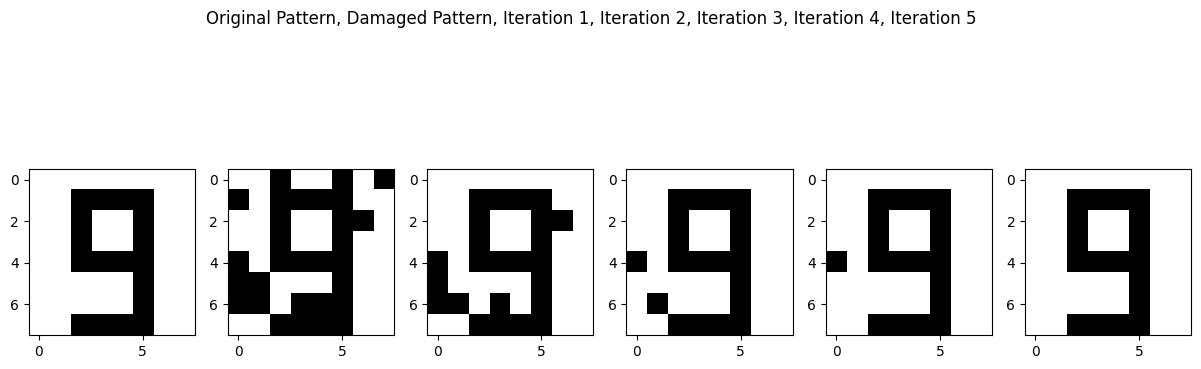

In [2]:
# 有噪声输入联想记忆。多次迭代,如果连续 两次结果相同，自动终止迭代。

import numpy as np
import matplotlib.pyplot as plt

class DiscreteHopfieldNetwork:
    def __init__(self, n):
        self.n = n
        self.weights = np.zeros((n, n))

    def train(self, patterns):
        for pattern in patterns:
            pattern = np.array(pattern)
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, pattern, steps=100):
        for _ in range(steps):
            index = np.random.randint(0, self.n)
            s = np.sign(np.dot(self.weights[index], pattern))
            if s == 0:
                s = pattern[index]
            pattern[index] = s
        return pattern

    def add_noise(self, pattern, noise_level):
        noisy_pattern = pattern.copy()
        num_noisy_elements = int(self.n * noise_level)
        indices = np.random.choice(self.n, num_noisy_elements, replace=False)
        noisy_pattern[indices] = -noisy_pattern[indices]
        return noisy_pattern

def plot_patterns(patterns, title):
    fig, axes = plt.subplots(1, len(patterns), figsize=(15, 5))
    for i, pattern in enumerate(patterns):
        axes[i].imshow(pattern.reshape((8, 8)), cmap='gray')
        axes[i].axis('on')
    plt.suptitle(title)
    plt.show()

# 生成测试数据
'''
patterns = [
    [1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1,
     1, 1, 1, -1, -1, -1, 1, 1],

    [-1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1,
     -1, -1, -1, 1, 1, 1, -1, -1]
]
'''

patterns = [
    [1,1,1,1,1,1,1,1,
    1,1,-1,-1,-1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,-1,-1,-1,1,1,
    1,1,1,1,1,-1,1,1,
    1,1,1,1,1,-1,1,1,
    1,1,-1,-1,-1,-1,1,1],
    
    [1,1,1,1,1,1,1,1,
    1,1,-1,-1,-1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,-1,-1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,1,1,-1,1,1,
    1,1,-1,-1,-1,-1,1,1]
    ]

# 将模式转换为numpy数组
patterns = [np.array(pattern) for pattern in patterns]

# 创建DHNN网络
dhnn = DiscreteHopfieldNetwork(len(patterns[0]))

# 训练网络
dhnn.train(patterns)

# 测试网络的回忆能力
# 创建部分损坏的模式
noise_level = 0.2  # 噪声比例
damaged_pattern = dhnn.add_noise(patterns[0], noise_level)

# 多次迭代回忆模式
num_iterations = 8  # 迭代次数
recalled_patterns = [damaged_pattern.copy()]
for _ in range(num_iterations):
    recalled_pattern = dhnn.recall(recalled_patterns[-1].copy())
    if np.all(recalled_pattern == recalled_patterns[-1]):
        print("Converged to a stable state.")
        break    
    recalled_patterns.append(recalled_pattern)

# 可视化结果
plot_patterns([patterns[0]] + recalled_patterns, 'Original Pattern, Damaged Pattern, Iteration 1, Iteration 2, Iteration 3, Iteration 4, Iteration 5')

### 8.3.2 应用CHNN解决优化计算问题

#### Page179 8.3.2.1代码实现，CHNN解决TSP问题

Iteration 0: Energy = 4.9493848992633875
Converged at iteration 3: Energy = 4.9493848992633875
Best Path: [0, 1, 5, 6, 8, 7, 9, 4, 2, 3]
Best Distance: 3.05163379944199


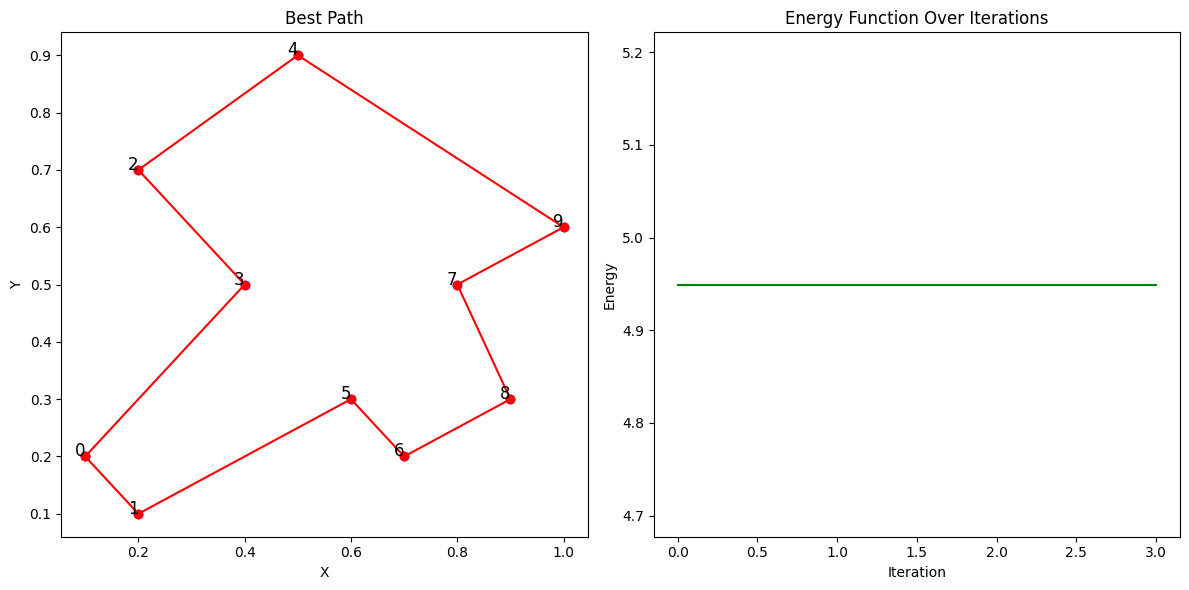

In [48]:
# Page179 8.3.2.1代码实现，CHNN解决TSP问题

import numpy as np
import matplotlib.pyplot as plt
import random

# 城市坐标
cities = np.array([
    [0.1, 0.2],
    [0.2, 0.1],
    [0.2, 0.7],
    [0.4, 0.5],
    [0.5, 0.9],
    [0.6, 0.3],
    [0.7, 0.2],
    [0.8, 0.5],
    [0.9, 0.3],
    [1.0, 0.6]
])

# 计算城市之间的距离矩阵
def distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i, num_cities):
            dist = np.linalg.norm(cities[i] - cities[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    return dist_matrix

# 使用贪心算法生成初始路径
def greedy_initial_path(cities, dist_matrix):
    num_cities = len(cities)
    start_city = 0
    path = [start_city]
    unvisited = set(range(1, num_cities))
    
    while unvisited:
        current_city = path[-1]
        next_city = min(unvisited, key=lambda city: dist_matrix[current_city][city])
        path.append(next_city)
        unvisited.remove(next_city)
    
    return path

# 将路径转换为状态矩阵
def path_to_state(path, num_cities):
    X = np.zeros((num_cities, num_cities))
    for i, city in enumerate(path):
        X[city, i] = 1
    return X

# 定义能量函数
def energy_function(X, A, B, C, D, dist_matrix):
    num_cities = X.shape[0]
    E_row = A * np.sum((np.sum(X, axis=1) - 1) ** 2)
    E_col = B * np.sum((np.sum(X, axis=0) - 1) ** 2)
    E_global = C * np.sum(np.sum(X, axis=0) * np.sum(X, axis=0))
    E_dist = D * np.sum(dist_matrix * np.dot(X, np.roll(X, -1, axis=1)))
    return E_row + E_col + E_global + E_dist

# 更新网络状态
def update_state(X, A, B, C, D, dist_matrix, learning_rate):
    num_cities = X.shape[0]
    dE_dX = np.zeros_like(X)
    
    # 行约束
    dE_dX += 2 * A * (np.sum(X, axis=1, keepdims=True) - 1)
    
    # 列约束
    dE_dX += 2 * B * (np.sum(X, axis=0) - 1).reshape(1, -1)
    
    # 全局约束
    dE_dX += 2 * C * np.sum(X, axis=0).reshape(1, -1)
    
    # 距离成本
    dE_dX += D * (np.dot(dist_matrix, np.roll(X, -1, axis=1)) + np.dot(np.roll(dist_matrix, 1, axis=1), X))
    
    X -= learning_rate * dE_dX
    X[X < 0] = 0
    X /= np.sum(X, axis=1, keepdims=True)
    return X

# 提取路径
def extract_path(X):
    num_cities = X.shape[0]
    path = []
    
    # 遍历每一列，找到每一步对应的城市
    for i in range(num_cities):
        city_index = np.argmax(X[:, i])
        path.append(city_index)
    
    return path

# 主函数
def solve_tsp_chhn(cities, A=1.0, B=1.0, C=0.1, D=1.0, learning_rate=0.01, max_iterations=10000):
    num_cities = len(cities)
    dist_matrix = distance_matrix(cities)
    
    # 使用贪心算法生成初始路径
    initial_path = greedy_initial_path(cities, dist_matrix)
    #random.shuffle(initial_path)
    X = path_to_state(initial_path, num_cities)
    
    energies = []
    same_energy_count = 0
    prev_energy = None
    
    for iteration in range(max_iterations):
        X = update_state(X, A, B, C, D, dist_matrix, learning_rate)
        energy = energy_function(X, A, B, C, D, dist_matrix)
        energies.append(energy)
        
        # 打印调试信息
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Energy = {energy}")
        
        # 检查能量值是否连续3次相同
        if prev_energy is not None and abs(energy - prev_energy) < 1e-10:
            same_energy_count += 1
        else:
            same_energy_count = 0
        
        if same_energy_count >= 3:
            print(f"Converged at iteration {iteration}: Energy = {energy}")
            break
        
        prev_energy = energy
    
    path = extract_path(X)
    path_distance = np.sum([dist_matrix[path[i], path[(i + 1) % num_cities]] for i in range(num_cities)])
    
    return path, path_distance, energies

# 运行CHNN算法
path, path_distance, energies = solve_tsp_chhn(cities)

# 打印结果
print("Best Path:", path)
print("Best Distance:", path_distance)

# 可视化路径
plt.figure(figsize=(12, 6))

# 城市坐标
plt.subplot(1, 2, 1)
plt.scatter(cities[:, 0], cities[:, 1], c='blue', marker='o')
for i, city in enumerate(cities):
    plt.text(city[0], city[1], str(i), fontsize=12, ha='right')

# 最佳路径
best_path_coords = cities[path + [path[0]]]
plt.plot(best_path_coords[:, 0], best_path_coords[:, 1], c='red', linestyle='-', marker='o')
plt.title('Best Path')
plt.xlabel('X')
plt.ylabel('Y')

# 能量函数变化
plt.subplot(1, 2, 2)
plt.plot(energies, c='green')
plt.title('Energy Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

#### 延展-穷举法、CHNN、贪心算法求解TSP问题能力、时间代价比较

Exhaustive Search: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3628800/3628800 [00:08<00:00, 433595.55it/s]


Exhaustive search took 8.38 seconds
Best path found by exhaustive search_穷举法找到的最佳路径: (0, 6, 4, 7, 1, 8, 2, 9, 3, 5)
Total distance of the best path: 3.05163379944199
Number of permutations for 10 cities: 3628800


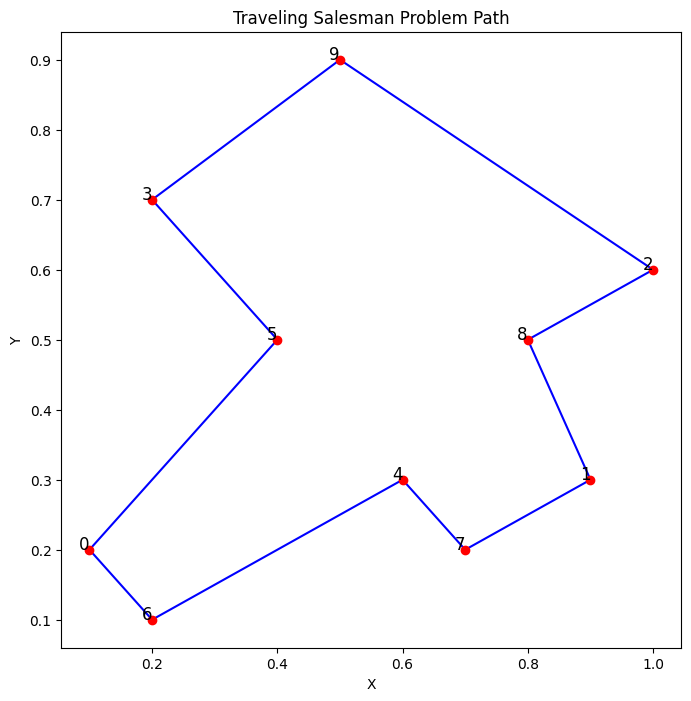

initial_path [0 6 4 7 1 8 2 9 3 5]


CHNN Running: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 6057.12it/s]


Final state after running: [ 8.64205194e-01 -9.49703747e+08 -2.02037445e+11 -2.90243757e+05
 -1.88285700e+05 -1.88737505e+04 -1.40361148e+01 -3.41021465e+06
 -2.67126712e+08 -1.11772416e+09  9.49703747e+08  7.02658568e-01
 -2.73113488e+02 -2.83509129e+08 -3.89585526e+03  5.46243756e+04
  1.36393651e+09 -9.79144831e+00  2.10441385e+00 -1.54504096e+07
  2.02037445e+11  2.73193236e+02  7.80612404e-01  9.23467231e+06
  1.65024604e+06  1.44649114e+06 -8.64306581e+11  1.43726890e+04
  2.28938137e+01  1.75471963e+05  2.90243783e+05  2.83509129e+08
 -9.23467229e+06  8.08242872e-01  4.91288100e+05  1.50149884e+02
 -4.22574887e+05  7.61001677e+08 -7.97873523e+07  2.69258091e+02
  1.88285732e+05  3.89594707e+03 -1.65024600e+06 -4.91288058e+05
  6.33282417e-01 -3.14650502e+01 -2.26936100e+04 -1.93999005e+00
 -5.49162852e+01 -1.26180618e+06  1.88737893e+04 -5.46243275e+04
 -1.44649110e+06 -1.50057545e+02  3.15652511e+01  7.11946458e-01
 -2.03203116e+04 -5.71584545e+03  7.86034259e+04 -1.19202018e+0

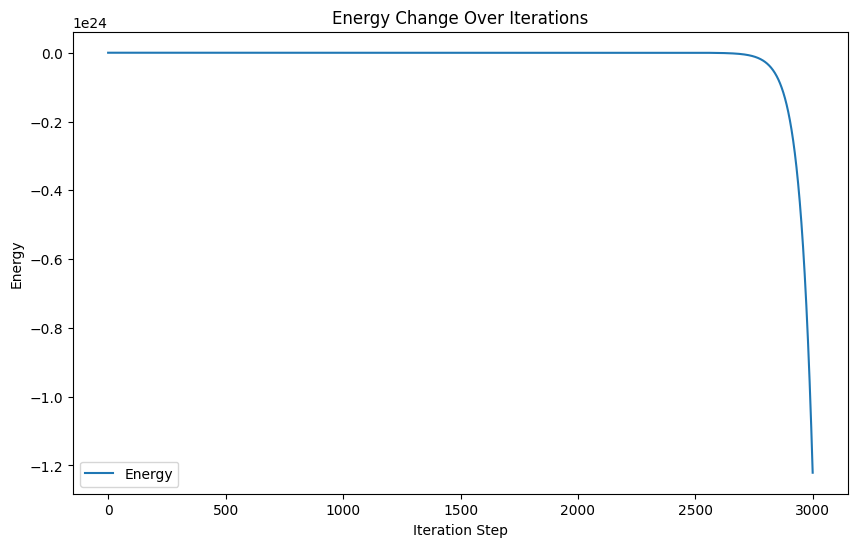

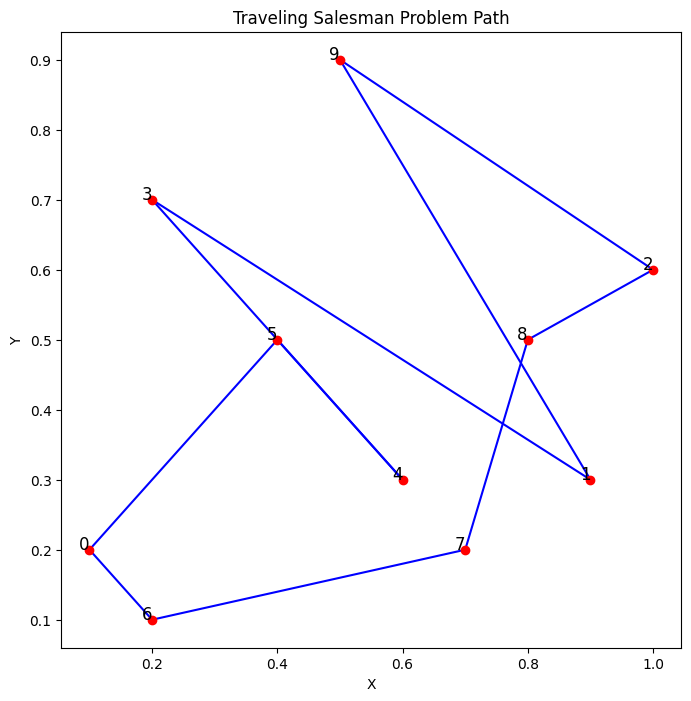

Greedy Initialization: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 134337.14it/s]

Greedy initialization took 0.00 seconds
Pure greedy solution took 0.00 seconds
Greedy path_贪心法规划的路径: [0, 6, 4, 7, 1, 8, 2, 9, 3, 5]
Total distance of the greedy path: 3.05163379944199


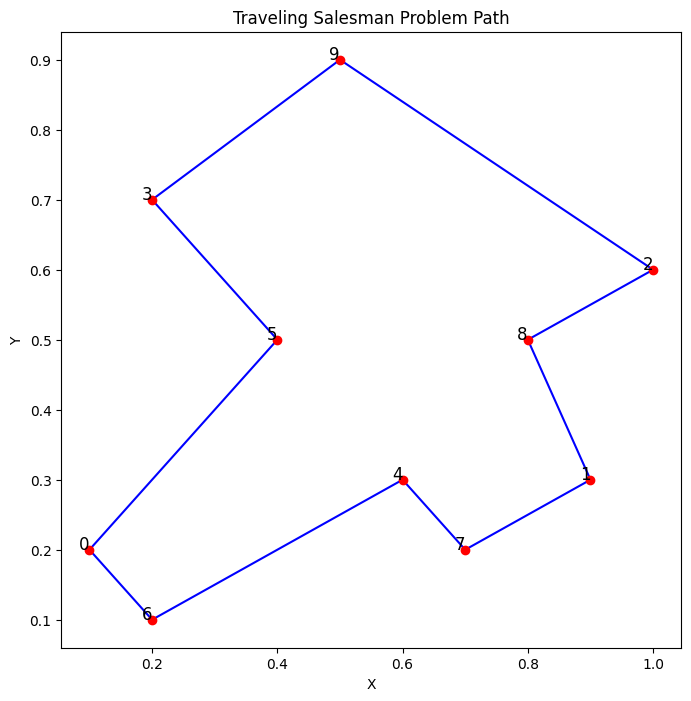

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import itertools
from tqdm import tqdm  # 导入 tqdm 库

# 计算路径的总距离
def calculate_total_distance(path, distances):
    total_distance = 0
    for i in range(len(path)):
        total_distance += distances[path[i], path[(i + 1) % len(path)]]
    return total_distance

# 绘制路径图
def plot_path(cities, path, show_labels=True):
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, color='red', zorder=2)
    for i in range(len(path)):
        next_city = path[(i + 1) % len(path)]
        plt.plot([x[path[i]], x[next_city]], [y[path[i]], y[next_city]], color='blue', zorder=1)

    if show_labels:
        for i, city in enumerate(cities):
            plt.text(city[0], city[1], str(i), fontsize=12, ha='right')

    plt.title('Traveling Salesman Problem Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# 使用穷举法寻找最短路径
def exhaustive_search(distances, num_cities):
    start_time = time.time()
    
    # 生成所有可能的路径
    all_permutations = itertools.permutations(range(num_cities))
    
    # 初始化最短路径和最短距离
    best_path = None
    best_distance = float('inf')
    
    # 遍历所有路径，并显示进度条
    for path in tqdm(all_permutations, total=math.factorial(num_cities), desc="Exhaustive Search"):
        distance = calculate_total_distance(path, distances)
        if distance < best_distance:
            best_distance = distance
            best_path = path
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Exhaustive search took {elapsed_time:.2f} seconds")
    
    return best_path, best_distance

# 连续 Hopfield 神经网络类
class ContinuousHopfieldNetwork:
    def __init__(self, num_cities, learning_rate=0.01, A=0.1, B=0.1, C=0.1):
        self.num_cities = num_cities
        self.learning_rate = learning_rate
        self.A = A  # 城市约束系数
        self.B = B  # 时间约束系数
        self.C = C  # 城市访问约束系数

    def train(self, distances, lambda_value=1.0):
        self.distances = distances
        self.lambda_value = lambda_value

    def run(self, initial_state, steps=1000, record_energy=False):
        state = initial_state.copy()
        energies = []

        # 使用 tqdm 显示进度条
        for _ in tqdm(range(steps), desc="CHNN Running"):
            energy = self.calculate_energy(state)
            if record_energy:
                energies.append(energy)

            gradient = self.calculate_gradient(state)
            state -= self.learning_rate * gradient

        if record_energy:
            return state, energies
        else:
            return state

    def calculate_energy(self, state):
        energy = 0
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    energy += state[i * self.num_cities + j] * state[j * self.num_cities + i] * self.distances[i][j]

        # 计算城市约束
        state_matrix = state.reshape(self.num_cities, self.num_cities)
        city_constraint = self.A * np.sum((np.sum(state_matrix, axis=1) - 1) ** 2)

        # 计算时间约束
        time_constraint = self.B * np.sum((np.sum(state_matrix, axis=0) - 1) ** 2)

        # 计算城市访问约束
        city_visit_constraint = self.C * np.sum((np.sum(state_matrix, axis=None) - self.num_cities) ** 2)

        return energy + city_constraint + time_constraint + city_visit_constraint

    def calculate_gradient(self, state):
        gradient = np.zeros_like(state)
        state_matrix = state.reshape(self.num_cities, self.num_cities)
        
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    gradient[i * self.num_cities + j] += state_matrix[j, i] * self.distances[i][j]

        # 添加约束项的梯度
        city_constraint_gradient = self.A * (2 * (np.sum(state_matrix, axis=1) - 1)).repeat(self.num_cities)
        time_constraint_gradient = self.B * (2 * (np.sum(state_matrix, axis=0) - 1)).repeat(self.num_cities)
        city_visit_constraint_gradient = self.C * (2 * (np.sum(state_matrix, axis=None) - self.num_cities)).repeat(self.num_cities * self.num_cities)

        gradient += city_constraint_gradient
        gradient += time_constraint_gradient
        gradient += city_visit_constraint_gradient

        return gradient

    def extract_path(self, state):
        state_matrix = state.reshape(self.num_cities, self.num_cities)
        path = []
        for i in range(self.num_cities):
            index = np.argmax(state_matrix[i])
            path.append(index)
        return path

# 使用贪心法初始化路径
def greedy_initialization(distances, num_cities):
    start_time = time.time()
    current_city = 0
    path = [current_city]
    unvisited_cities = set(range(1, num_cities))

    # 使用 tqdm 显示进度条
    for _ in tqdm(range(num_cities - 1), desc="Greedy Initialization"):
        next_city = min(unvisited_cities, key=lambda city: distances[current_city][city])
        path.append(next_city)
        unvisited_cities.remove(next_city)
        current_city = next_city

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Greedy initialization took {elapsed_time:.2f} seconds")
    return path

# 将路径转换为CHNN的状态向量
def path_to_state(path, num_cities):
    state = np.zeros(num_cities * num_cities)
    for t, city in enumerate(path):
        state[t * num_cities + city] = 1
    return state

if __name__ == "__main__":
    # 假设有10个城市，生成随机城市坐标
    num_cities = 10
    #cities = np.random.rand(num_cities, 2) * 10
    cities = np.array([
    [0.1, 0.2],
    [0.9, 0.3],
    [1.0, 0.6],
    [0.2, 0.7],
    [0.6, 0.3],
    [0.4, 0.5],
    [0.2, 0.1],
    [0.7, 0.2],
    [0.8, 0.5],
    [0.5, 0.9]
    ])
    
    # 计算城市之间的距离矩阵
    distances = np.linalg.norm(cities[:, np.newaxis, :] - cities[np.newaxis, :, :], axis=-1)

    # 使用穷举法寻找最短路径
    best_path, best_distance = exhaustive_search(distances, num_cities)
    print("Best path found by exhaustive search_穷举法找到的最佳路径:", best_path)
    print("Total distance of the best path:", best_distance)

    # 计算穷举的数量
    num_permutations = math.factorial(num_cities)
    print(f"Number of permutations for {num_cities} cities: {num_permutations}")

    # 可视化显示最优路径
    plot_path(cities, best_path, show_labels=True)

    # 创建CHNN
    chnn = ContinuousHopfieldNetwork(num_cities, learning_rate=0.01, A=0.1, B=0.1, C=0.1)

    # 训练CHNN
    chnn.train(distances, lambda_value=1.0)

    # 使用贪心法初始化路径
    #initial_path = greedy_initialization(distances, num_cities)
    initial_path=np.array([0, 6, 4, 7, 1, 8, 2, 9, 3, 5])
    #initial_path=np.array([0, 4, 6, 7, 8, 1, 2, 9, 3, 5])
    print("initial_path",initial_path)
    
    initial_state = path_to_state(initial_path, num_cities)

    # 运行CHNN并观察最终状态及能量变化
    final_state, energies = chnn.run(initial_state, steps=3000, record_energy=True)
    print("Final state after running:", final_state)

    # 提取路径
    path = chnn.extract_path(final_state)
    print("Extracted path_CHNN规划的路径:", path)

    # 确保每个城市都经过一次
    if len(set(path)) != num_cities:
        print("Warning: Not all cities were visited exactly once. Adjusting the path...")
        # 如果路径不满足条件，重新调整路径
        adjusted_path = []
        visited = set()
        for city in path:
            if city not in visited:
                adjusted_path.append(city)
                visited.add(city)
        path = adjusted_path + list(set(range(num_cities)) - visited)
        print("Adjusted path_CHNN规划经过调整后的路径:", path)

    # 计算路径的总距离
    total_distance = calculate_total_distance(path, distances)
    print("Total distance of the path:", total_distance)

    # 绘制能量变化图
    plt.figure(figsize=(10, 6))
    plt.plot(energies, label='Energy')
    plt.xlabel('Iteration Step')
    plt.ylabel('Energy')
    plt.title('Energy Change Over Iterations')
    plt.legend()
    plt.show()

    # 可视化显示最优路径
    plot_path(cities, path, show_labels=True)

    # 使用纯粹的贪心法解决TSP问题
    start_time = time.time()
    greedy_path = greedy_initialization(distances, num_cities)
    end_time = time.time()
    greedy_distance = calculate_total_distance(greedy_path, distances)
    elapsed_time = end_time - start_time
    print(f"Pure greedy solution took {elapsed_time:.2f} seconds")
    print("Greedy path_贪心法规划的路径:", greedy_path)
    print("Total distance of the greedy path:", greedy_distance)

    # 可视化显示贪心法的路径
    plot_path(cities, greedy_path, show_labels=True)

### 双向联想记忆（BAM）神经网络

#### Page184 例8.3，可视化BAM网络恢复字母联想


Testing recall from S to E:


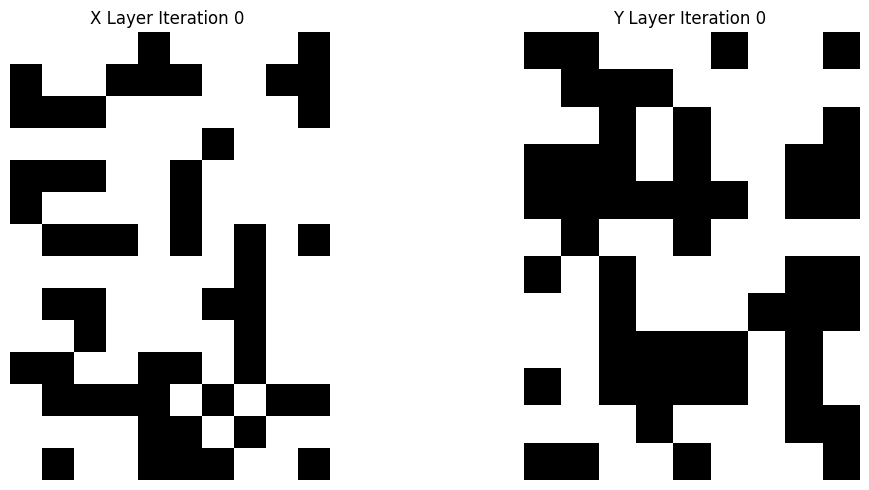

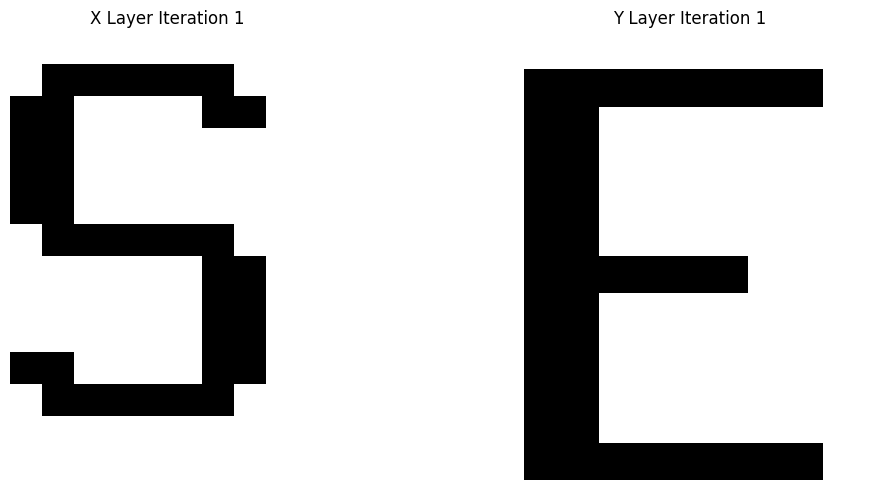

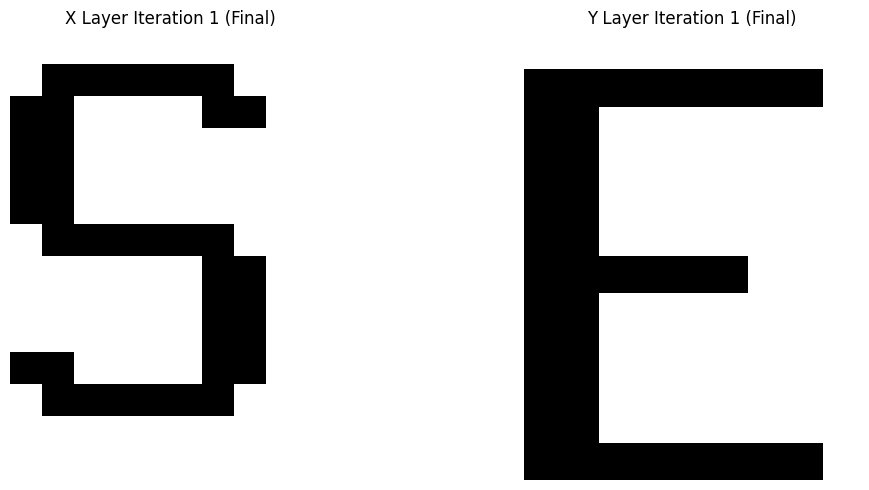


Testing recall from E to S:


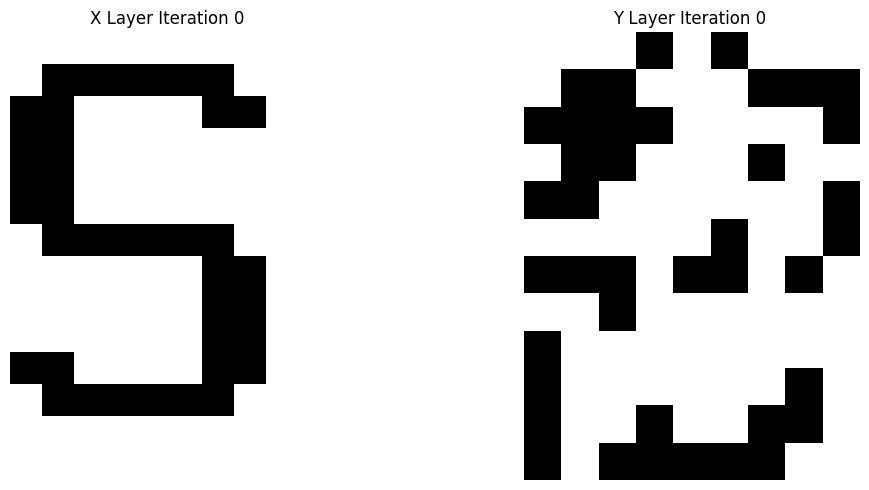

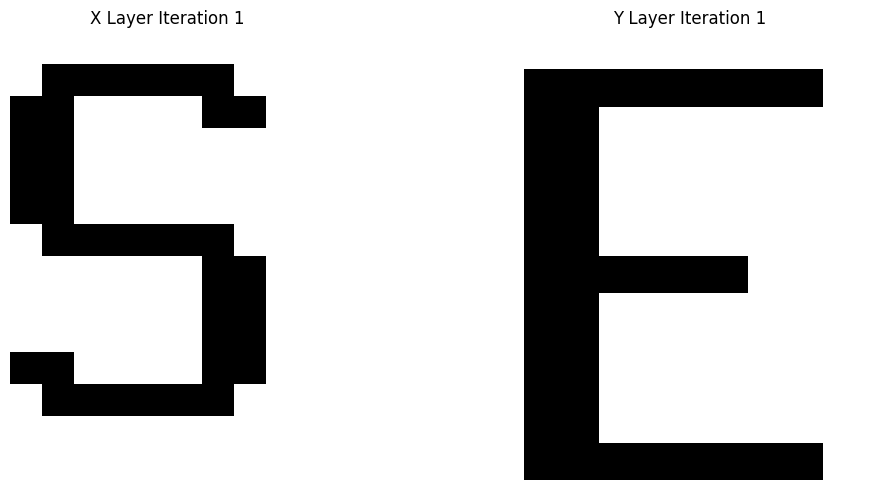

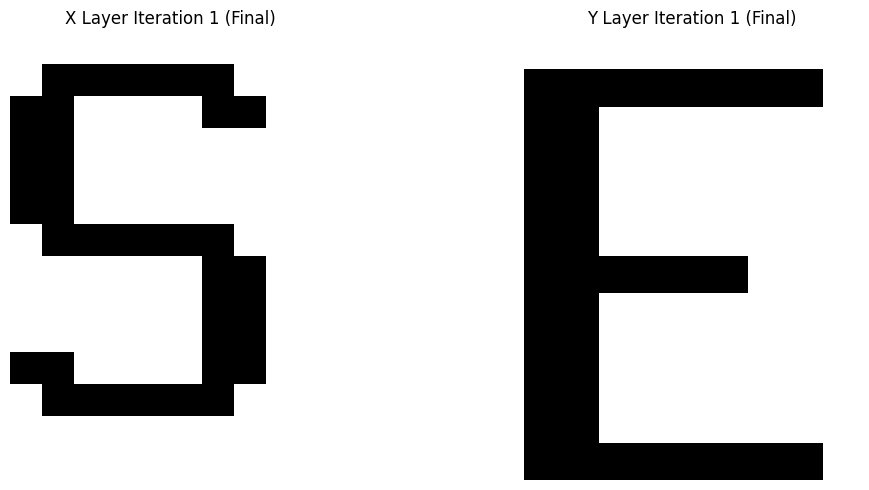

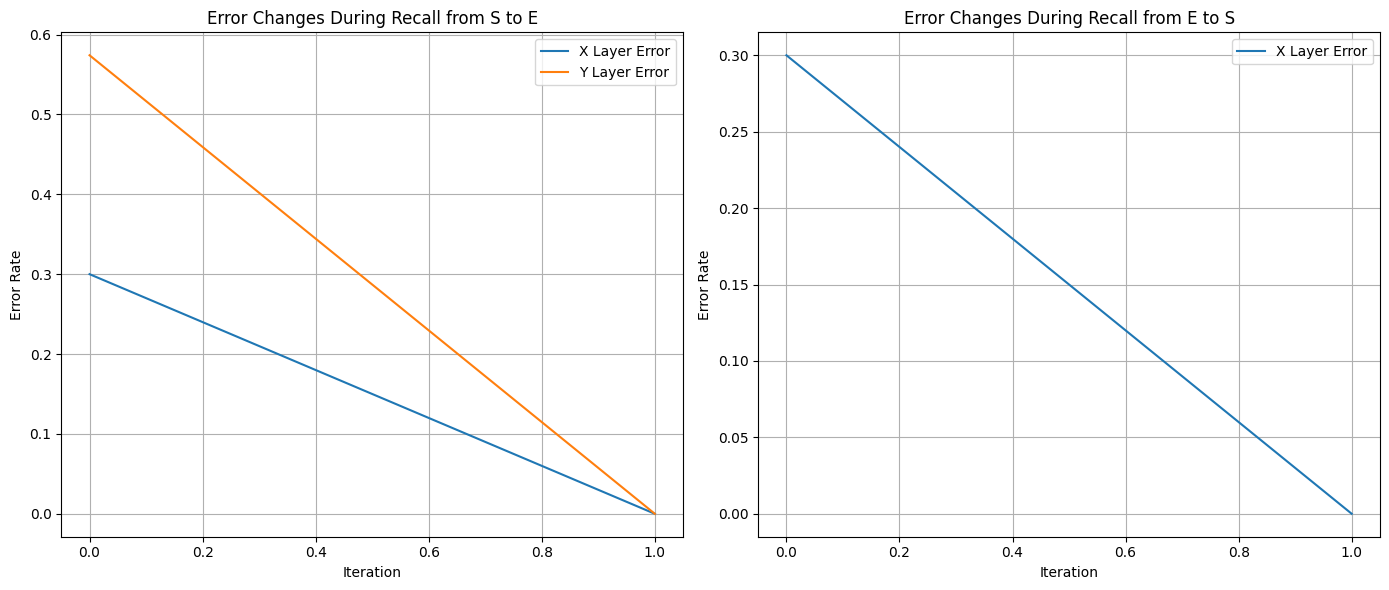

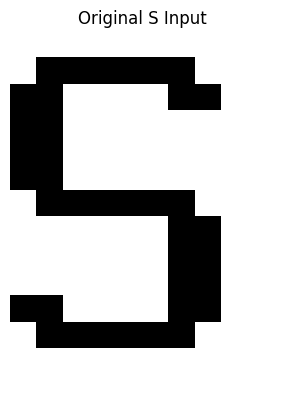

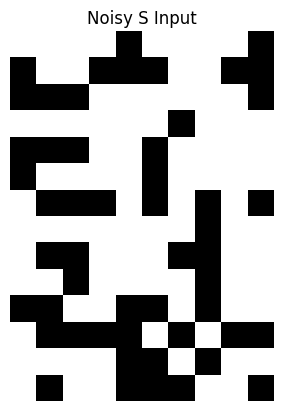

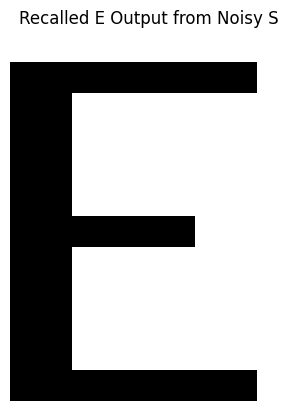

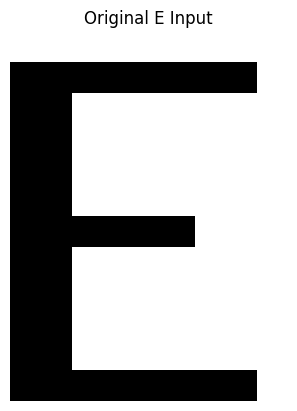

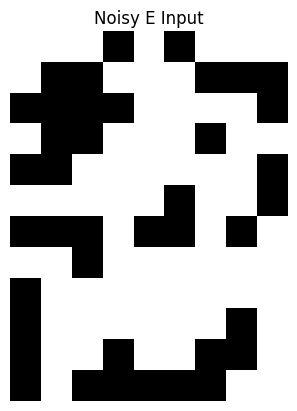

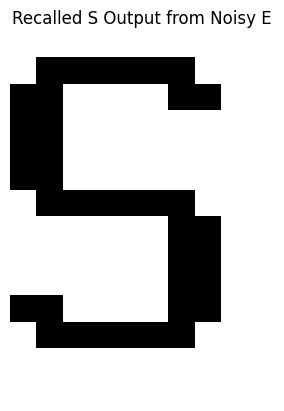

In [51]:
# Page184 例8.3，可视化BAM网络恢复字母联想

import numpy as np
import matplotlib.pyplot as plt

class BAMNetwork:
    def __init__(self, x_size, y_size):
        self.x_size = x_size
        self.y_size = y_size
        self.weights = np.zeros((x_size, y_size))
    
    def train(self, patterns):
        for x_pattern, y_pattern in patterns:
            x_bipolar = np.where(np.array(x_pattern) > 0, 1, -1)
            y_bipolar = np.where(np.array(y_pattern) > 0, 1, -1)
            self.weights += np.outer(x_bipolar, y_bipolar)
    
    def recall_y(self, x_input):
        return np.sign(np.dot(self.weights.T, x_input))
    
    def recall_x(self, y_input):
        return np.sign(np.dot(self.weights, y_input))
    
    def propagate_until_stable(self, input_layer, initial_output=None, visualize=False, x_shape=None, y_shape=None, target_x=None, target_y=None):
        if len(input_layer) == self.x_size:
            current_x = np.where(np.array(input_layer) > 0, 1, -1)
            if initial_output is None:
                current_y = np.random.choice([-1, 1], size=self.y_size)
            else:
                current_y = np.where(np.array(initial_output) > 0, 1, -1)

            errors_x = []
            errors_y = []
            iteration = 0
            while True:
                new_y = self.recall_y(current_x)
                new_x = self.recall_x(new_y)
                
                # 计算汉明距离作为误差
                error_x = np.sum(new_x != current_x) / len(current_x)
                error_y = np.sum(new_y != current_y) / len(current_y)
                
                errors_x.append(error_x)
                errors_y.append(error_y)
                
                # 可视化当前模式
                if visualize:
                    self.visualize_iteration(iteration, bipolar_to_binary(current_x), bipolar_to_binary(current_y), x_shape, y_shape)
                
                if np.array_equal(new_x, current_x) and np.array_equal(new_y, current_y):
                    break
                
                current_x, current_y = new_x, new_y
                iteration += 1
            
            # 最终结果的可视化
            if visualize:
                self.visualize_iteration(iteration, bipolar_to_binary(current_x), bipolar_to_binary(current_y), x_shape, y_shape, final=True)
            
            return new_x, new_y, errors_x, errors_y
        
        elif len(input_layer) == self.y_size:
            current_y = np.where(np.array(input_layer) > 0, 1, -1)
            if initial_output is None:
                current_x = np.random.choice([-1, 1], size=self.x_size)
            else:
                current_x = np.where(np.array(initial_output) > 0, 1, -1)

            errors_x = []
            errors_y = []
            iteration = 0
            while True:
                new_x = self.recall_x(current_y)
                new_y = self.recall_y(new_x)
                
                # 计算汉明距离作为误差
                error_x = np.sum(new_x != current_x) / len(current_x)
                error_y = np.sum(new_y != current_y) / len(current_y)
                
                errors_x.append(error_x)
                errors_y.append(error_y)
                
                # 可视化当前模式
                if visualize:
                    self.visualize_iteration(iteration, bipolar_to_binary(new_x), bipolar_to_binary(current_y), x_shape, y_shape)
                
                if np.array_equal(new_x, current_x) and np.array_equal(new_y, current_y):
                    break
                
                current_x, current_y = new_x, new_y
                iteration += 1
            
            # 最终结果的可视化
            if visualize:
                self.visualize_iteration(iteration, bipolar_to_binary(current_x), bipolar_to_binary(current_y), x_shape, y_shape, final=True)
            
            return new_x, new_y, errors_x, errors_y
        
        else:
            raise ValueError("Input layer size must match either X or Y layer size.")
    
    def visualize_iteration(self, iteration, x_pattern, y_pattern, x_shape, y_shape, final=False):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(x_pattern.reshape(x_shape), cmap='gray_r', vmin=0, vmax=1)
        plt.title(f'X Layer Iteration {iteration} {"(Final)" if final else ""}')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(y_pattern.reshape(y_shape), cmap='gray_r', vmin=0, vmax=1)
        plt.title(f'Y Layer Iteration {iteration} {"(Final)" if final else ""}')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# 测试数据
S = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,0,1,1,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])

A = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,0,0,1,0,0,0],
    [0,0,0,1,0,0,1,0,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])

E = np.array([
    [0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,0]
])

T=np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]    
])

# 将 S 和 E 图案展平为一维向量
S_flat = S.flatten()
E_flat = E.flatten()
A_flat = A.flatten()
T_flat = T.flatten()

# 创建并训练 BAM 网络
bam_net = BAMNetwork(len(S_flat), len(E_flat))
bam_net.train([(S_flat, E_flat)])
#bam_net = BAMNetwork(len(A_flat), len(T_flat))
#bam_net.train([(A_flat, T_flat)])

# 向测试数据添加噪声
def add_noise(pattern, noise_level=0.1):
    noisy_pattern = pattern.copy()
    num_pixels_to_flip = int(noise_level * len(pattern))
    indices_to_flip = np.random.choice(len(pattern), num_pixels_to_flip, replace=False)
    noisy_pattern[indices_to_flip] = 1 - noisy_pattern[indices_to_flip]  # 反转颜色
    return noisy_pattern

# 定义一个函数将双极性模式转换回二进制模式（1 -> 1, -1 -> 0）
def bipolar_to_binary(pattern):
    return np.where(pattern > 0, 1, 0)


# 测试回忆功能：从 S 回忆 E
print("\nTesting recall from S to E:")
test_input_s = add_noise(S_flat, noise_level=0.3)  # 添加10%噪声
recalled_x, recalled_y, errors_x, errors_y = bam_net.propagate_until_stable(
    test_input_s, 
    visualize=True, 
    x_shape=S.shape, 
    y_shape=E.shape,
    target_x=S_flat,
    target_y=E_flat
)


print("\nTesting recall from E to S:")
# 额外测试：从 E 回忆 S
test_input_e = add_noise(E_flat, noise_level=0.3)  # 添加10%噪声
recalled_x_from_e, _, errors_x_from_e, _ = bam_net.propagate_until_stable(
    test_input_e, 
    initial_output=test_input_s, 
    visualize=True, 
    x_shape=S.shape, 
    y_shape=E.shape,
    target_x=S_flat,
    target_y=E_flat
)

'''
# 测试回忆功能：从 A 回忆 T
print("\nTesting recall from A to T:")
test_input_a = add_noise(A_flat, noise_level=0.3)  # 添加10%噪声
recalled_x, recalled_y, errors_x, errors_y = bam_net.propagate_until_stable(
    test_input_a, 
    visualize=True, 
    x_shape=A.shape, 
    y_shape=T.shape,
    target_x=A_flat,
    target_y=T_flat
)
'''

# 绘制误差变化图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_x, label="X Layer Error")
plt.plot(errors_y, label="Y Layer Error")
plt.title("Error Changes During Recall from S to E")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(errors_x_from_e, label="X Layer Error")
plt.title("Error Changes During Recall from E to S")
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 可视化显示
def plot_pattern(pattern, title, shape):
    plt.figure()
    plt.imshow(pattern.reshape(shape), cmap='gray_r', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# 显示原始输入和回忆结果
plot_pattern(S, "Original S Input", S.shape)
plot_pattern(test_input_s.reshape(S.shape), "Noisy S Input", S.shape)
plot_pattern(bipolar_to_binary(recalled_y), "Recalled E Output from Noisy S", E.shape)

plot_pattern(E, "Original E Input", E.shape)
plot_pattern(test_input_e.reshape(E.shape), "Noisy E Input", E.shape)
plot_pattern(bipolar_to_binary(recalled_x_from_e), "Recalled S Output from Noisy E", S.shape)
